In [13]:
from pymongo import MongoClient
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from bson import ObjectId
import random
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017')
db = client['collaborativefilteringtest']  # Database name
users_collection = db['users']
posts_collection = db['posts']
likes_collection = db['likes']
answers_collection = db['answers']  # Add answers collection



In [14]:
def predict_rating(user_idx, post_idx, train_matrix, user_similarity):
    sim_scores = user_similarity[user_idx]
    item_ratings = train_matrix[:, post_idx]
    non_zero_ratings = item_ratings[item_ratings != 0]

    weighted_sum = 0
    similarity_sum = 0
    for idx in range(len(non_zero_ratings)):
        similarity = sim_scores[idx]
        weighted_sum += similarity * item_ratings[idx]
        similarity_sum += similarity

    if similarity_sum == 0:
        return 0
    return weighted_sum / similarity_sum



post_id:  {'6701a1a1a1a1a1a1a1a1a1a1': 0, '6701a1a1a1a1a1a1a1a1a1a2': 1, '6701a1a1a1a1a1a1a1a1a1a3': 2, '6701a1a1a1a1a1a1a1a1a1a4': 3, '6701a1a1a1a1a1a1a1a1a1a5': 4, '6701a1a1a1a1a1a1a1a1a1a6': 5, '6701a1a1a1a1a1a1a1a1a1a7': 6, '6701a1a1a1a1a1a1a1a1a1a8': 7, '6701a1a1a1a1a1a1a1a1a1a9': 8, '6701a1a1a1a1a1a1a1a1a1aa': 9, '6701a1a1a1a1a1a1a1a1a1ab': 10, '6701a1a1a1a1a1a1a1a1a1ac': 11, '6701a1a1a1a1a1a1a1a1a1ad': 12, '6701a1a1a1a1a1a1a1a1a1ae': 13, '6701a1a1a1a1a1a1a1a1a1af': 14, '6701a1a1a1a1a1a1a1a1a1b0': 15, '6701a1a1a1a1a1a1a1a1a1b1': 16, '6701a1a1a1a1a1a1a1a1a1b2': 17, '6701a1a1a1a1a1a1a1a1a1b3': 18, '6701a1a1a1a1a1a1a1a1a1b4': 19, '6701a1a1a1a1a1a1a1a1a1b5': 20, '6701a1a1a1a1a1a1a1a1a1b6': 21, '6701a1a1a1a1a1a1a1a1a1b7': 22, '6701a1a1a1a1a1a1a1a1a1b8': 23, '6701a1a1a1a1a1a1a1a1a1b9': 24, '6701a1a1a1a1a1a1a1a1a1ba': 25, '6701a1a1a1a1a1a1a1a1a1bb': 26, '6701a1a1a1a1a1a1a1a1a1bc': 27, '6701a1a1a1a1a1a1a1a1a1bd': 28, '6701a1a1a1a1a1a1a1a1a1be': 29, '6701a1a1a1a1a1a1a1a1a1bf': 30, '6701a1

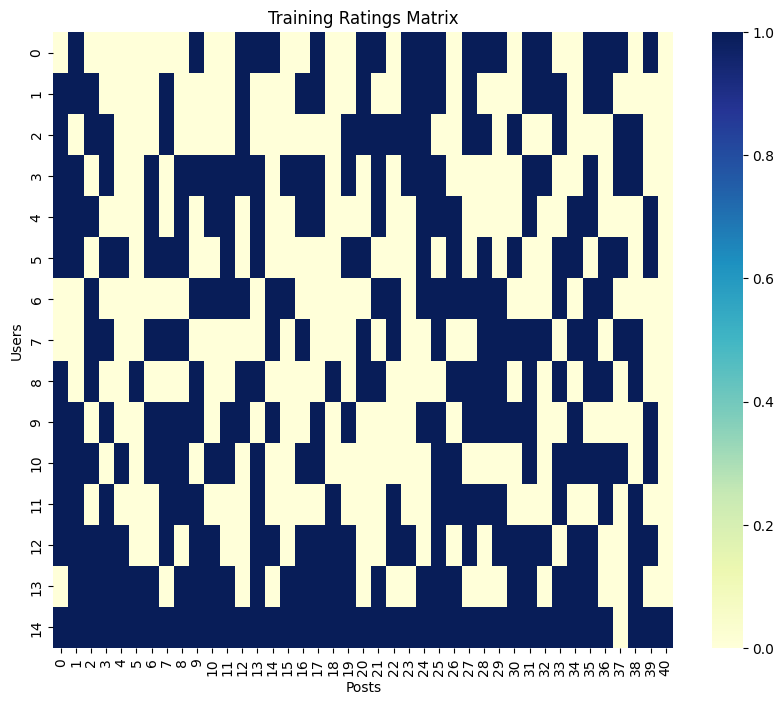

------------------------------------------------------
user similarity shape:  (15, 15)
user similarity:  [[1.         0.65079137 0.43386092 0.60612813 0.47434165 0.4
  0.5797509  0.46169026 0.5797509  0.58554004 0.43915503 0.43386092
  0.57008771 0.39467611 0.67175144]
 [0.65079137 1.         0.52941176 0.55629391 0.51449576 0.3796283
  0.45732956 0.44513191 0.51449576 0.47633051 0.58218174 0.41176471
  0.57078179 0.42808634 0.65192024]
 [0.43386092 0.52941176 1.         0.45514956 0.22866478 0.54232614
  0.45732956 0.5007734  0.51449576 0.47633051 0.26462806 0.47058824
  0.47565149 0.3805212  0.61357199]
 [0.60612813 0.55629391 0.45514956 1.         0.68806246 0.4662524
  0.44232587 0.47836487 0.39317855 0.59152048 0.59152048 0.40457739
  0.61339562 0.73607474 0.72531852]
 [0.47434165 0.51449576 0.22866478 0.68806246 1.         0.52704628
  0.44444444 0.43259046 0.38888889 0.56577895 0.8229512  0.34299717
  0.5547002  0.73960026 0.67082039]
 [0.4        0.3796283  0.54232614 0.466252

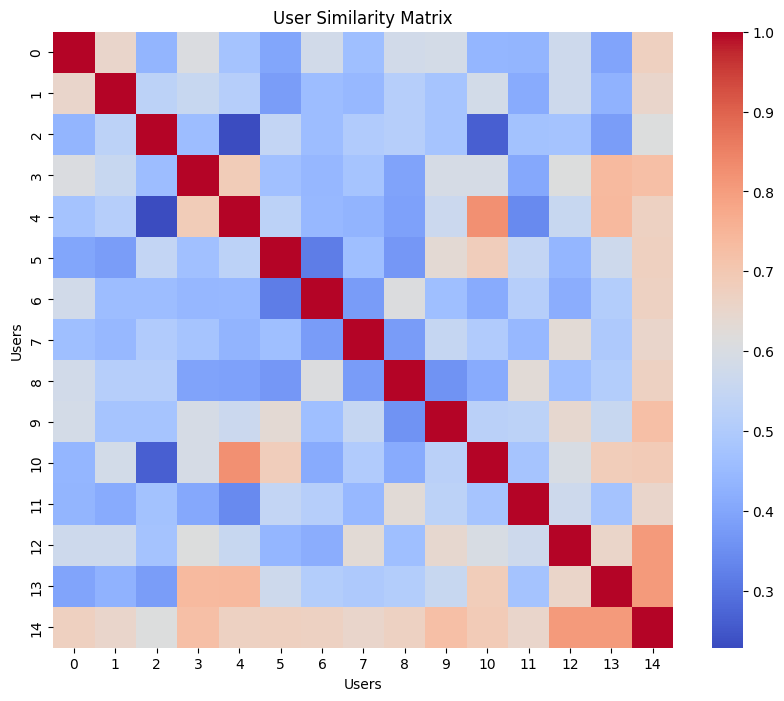

Processing recommendations for user index: 0
sim_scores:  [1.         0.65079137 0.43386092 0.60612813 0.47434165 0.4
 0.5797509  0.46169026 0.5797509  0.58554004 0.43915503 0.43386092
 0.57008771 0.39467611 0.67175144]
------------------------------------------------------
similar users:  [14  1  3  9  6  8 12  4  7 10  2 11  5 13]
------------------------------------------------------
post score:  [0.67175144 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144
 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144
 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144
 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144
 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144
 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144
 0.67175144 0.         0.67175144 0.67175144 0.67175144]
------------------------------------------------------
post score:  [1.32254282 1.32254282 1.32254282 0.67175144 0.67175144 0.67175144
 0.

(array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
         0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
         1., 0., 0., 1., 1., 1., 0., 1., 0.],
        [1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
         1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
         1., 1., 0., 1., 1., 0., 0., 0., 0.],
        [1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
         0., 1., 0., 0., 0., 1., 1., 0., 0.],
        [1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
         1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
         1., 0., 0., 1., 0., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
         1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
         0., 0., 1., 1., 0., 0., 0., 1., 0.],
        [1., 1., 0., 1., 1., 0., 1., 1.,

In [15]:
def train_model():
    # Fetch data from MongoDB
    users = list(users_collection.find())
    posts = list(posts_collection.find())
    likes = list(likes_collection.find())
    answers = list(answers_collection.find())  # Fetch answers

    # Create mappings for user and post IDs (using string IDs)
    user_ids = {str(user['_id']): idx for idx, user in enumerate(users)}
    post_ids = {str(post['_id']): idx for idx, post in enumerate(posts)}

    print('post_id: ', post_ids , 'user_ids: ', user_ids)

    # Create rating matrix
    num_users = len(users)
    num_posts = len(posts)
    ratings_matrix = np.zeros((num_users, num_posts))

    for like in likes:
        user_id_str = str(like['user_id'])
        post_id_str = str(like['post_id'])
        
        # Debug output: Check if the ID exists in the mappings
        if user_id_str not in user_ids:
            print(f"User ID {user_id_str} not found in user_ids mapping")
        if post_id_str not in post_ids:
            print(f"Post ID {post_id_str} not found in post_ids mapping")

        user_idx = user_ids[user_id_str]
        post_idx = post_ids[post_id_str]
        
        ratings_matrix[user_idx, post_idx] = 1

    for answer in answers:
        user_id_str = str(answer['user_id'])
        post_id_str = str(answer['post_id'])
        
        # Debug output: Check if the ID exists in the mappings
        if user_id_str not in user_ids:
            print(f"User ID {user_id_str} not found in user_ids mapping")
        if post_id_str not in post_ids:
            print(f"Post ID {post_id_str} not found in post_ids mapping")

        user_idx = user_ids[user_id_str]
        post_idx = post_ids[post_id_str]
        
        ratings_matrix[user_idx, post_idx] = 1

    def create_train_test_split(ratings_matrix, test_size=0.2):
        num_users, num_posts = ratings_matrix.shape
        # Create an empty matrix for train and test
        train_matrix = np.copy(ratings_matrix)
        test_matrix = np.zeros_like(ratings_matrix)

        for user in range(num_users):
            # Find the indices of non-zero entries (interactions) for the current user
            non_zero_indices = np.nonzero(ratings_matrix[user])[0]
            
            if len(non_zero_indices) < 2:
                continue  # Skip users with less than two interactions
            
            # Split indices into train and test
            train_indices, test_indices = train_test_split(non_zero_indices, test_size=test_size, random_state=42)
            
            # Update train and test matrices
            train_matrix[user, train_indices] = ratings_matrix[user, train_indices]
            test_matrix[user, test_indices] = ratings_matrix[user, test_indices]

        return train_matrix, test_matrix

    # Train-test split
    train_matrix, test_matrix = create_train_test_split(ratings_matrix, test_size=0.2)

    # Visualize the ratings matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(train_matrix, cmap='YlGnBu', cbar=True)
    plt.title('Training Ratings Matrix')
    plt.xlabel('Posts')
    plt.ylabel('Users')
    plt.show()

    # Calculate cosine similarity between users
    user_similarity = cosine_similarity(train_matrix)
    print('------------------------------------------------------')
    print('user similarity shape: ', user_similarity.shape)
    print('user similarity: ', user_similarity)
    print('------------------------------------------------------')

    # Visualize the user similarity matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(user_similarity, cmap='coolwarm', cbar=True)
    plt.title('User Similarity Matrix')
    plt.xlabel('Users')
    plt.ylabel('Users')
    plt.show()
    
    # Function to recommend posts for a given user based on similar users' likes
    def recommend_posts(user_idx, num_recommendations=5):
        print('Processing recommendations for user index:', user_idx)
        sim_scores = user_similarity[user_idx]
        print('sim_scores: ', sim_scores)
        print('------------------------------------------------------')
        
        similar_users = np.argsort(sim_scores)[::-1][1:]  # Exclude the user itself
        print('similar users: ', similar_users)
        print('------------------------------------------------------')
        
        post_scores = np.zeros(num_posts)
    
        for similar_user in similar_users:
            post_scores += sim_scores[similar_user] * train_matrix[similar_user]
            print('post score: ', post_scores)
            print('------------------------------------------------------')

        print('post score rate: ',  post_scores[train_matrix[user_idx] > 0])
        print('------------------------------------------------------')
        post_scores[train_matrix[user_idx] > 0] = 0
        print('post score filter: ',  post_scores[train_matrix[user_idx] > 0])
        print('------------------------------------------------------')
        recommended_post_indices = np.argsort(post_scores)[::-1][:num_recommendations]
        return recommended_post_indices

    # Generate recommendations for all users and save to a dictionary
    recommendations = {}
    for user_id_str, user_idx in user_ids.items():
        if user_idx >= user_similarity.shape[0]:
            print(f"User index {user_idx} is out of bounds for user_similarity with shape {user_similarity.shape}")
            continue
        recommended_posts = recommend_posts(user_idx, num_recommendations=5)
        print('------------------------------------------------------')
        print('recommended posts: ', recommended_posts)
        print('------------------------------------------------------')
        recommended_post_ids = [list(post_ids.keys())[list(post_ids.values()).index(post_idx)] for post_idx in recommended_posts]
        recommendations[user_id_str] = recommended_post_ids

    # Save recommendations to a JSON file
    with open('recommendations.json', 'w') as f:
        json.dump(recommendations, f)

    # Evaluate model
    actual_ratings = []
    predicted_ratings = []

    for user_idx in range(len(test_matrix)):
        for post_idx in range(num_posts):
            if test_matrix[user_idx, post_idx] != 0:
                actual_ratings.append(test_matrix[user_idx, post_idx])
                predicted_ratings.append(predict_rating(user_idx, post_idx, train_matrix, user_similarity))

    mae = mean_absolute_error(actual_ratings, predicted_ratings)
    print(f'Mean Absolute Error: {mae}')

    return train_matrix, recommendations, user_similarity

train_model()

In [16]:
# Load recommendations from JSON file
with open('recommendations.json', 'r') as f:
    recommendations = json.load(f)

# Convert recommendations to a pandas DataFrame for analysis
recommendations_df = pd.DataFrame.from_dict(recommendations, orient='index')
recommendations_df.columns = [f'Recommendation_{i+1}' for i in range(recommendations_df.shape[1])]
recommendations_df.reset_index(inplace=True)
recommendations_df.rename(columns={'index': 'User_ID'}, inplace=True)

# Display the first few rows of the recommendations DataFrame
recommendations_df.head()


,User_ID,Recommendation_1,Recommendation_2,Recommendation_3,Recommendation_4,Recommendation_5
0,669c0b8e2ea43ac3b0c83bd2,6701a1a1a1a1a1a1a1a1a1a1,6701a1a1a1a1a1a1a1a1a1a3,6701a1a1a1a1a1a1a1a1a1a8,6701a1a1a1a1a1a1a1a1a1c2,6701a1a1a1a1a1a1a1a1a1a4
1,669c0b8e2ea43ac3b0c83bd3,6701a1a1a1a1a1a1a1a1a1ae,6701a1a1a1a1a1a1a1a1a1aa,6701a1a1a1a1a1a1a1a1a1bd,6701a1a1a1a1a1a1a1a1a1a4,6701a1a1a1a1a1a1a1a1a1a9
2,669c0b8e2ea43ac3b0c83bd4,6701a1a1a1a1a1a1a1a1a1ba,6701a1a1a1a1a1a1a1a1a1c0,6701a1a1a1a1a1a1a1a1a1a2,6701a1a1a1a1a1a1a1a1a1c4,6701a1a1a1a1a1a1a1a1a1ae
3,669c0b8e2ea43ac3b0c83bd5,6701a1a1a1a1a1a1a1a1a1a3,6701a1a1a1a1a1a1a1a1a1c3,6701a1a1a1a1a1a1a1a1a1a8,6701a1a1a1a1a1a1a1a1a1bc,6701a1a1a1a1a1a1a1a1a1c2
4,669c0b8e2ea43ac3b0c83bd6,6701a1a1a1a1a1a1a1a1a1aa,6701a1a1a1a1a1a1a1a1a1a4,6701a1a1a1a1a1a1a1a1a1c2,6701a1a1a1a1a1a1a1a1a1a8,6701a1a1a1a1a1a1a1a1a1c5


In [17]:
def visualize_recommendations(recommendations):
    # Load recommendations into a DataFrame
    recommendations_df = pd.DataFrame.from_dict(recommendations, orient='index')

    # Distribution of unique recommendations per user
    unique_recommendations_count = recommendations_df.apply(lambda x: len(set(x.dropna())), axis=1)

    plt.figure(figsize=(12, 6))
    sns.histplot(unique_recommendations_count, kde=False, bins=30)
    plt.xlabel('Number of Unique Recommendations per User')
    plt.ylabel('Number of Users')
    plt.title('Distribution of Unique Recommendations per User')
    plt.show()

    # Review recommendations for a few specific users
    user_sample = random.sample(list(recommendations.keys()), 5)
    for user_id in user_sample:
        print(f"Recommendations for user {user_id}: {recommendations[user_id]}")

    # Analyze post popularity in recommendations
    all_recommendations = recommendations_df.values.flatten()
    post_counts = pd.Series(all_recommendations).value_counts()

    plt.figure(figsize=(12, 6))
    sns.histplot(post_counts, bins=30, kde=False)
    plt.xlabel('Number of Recommendations per Post')
    plt.ylabel('Number of Posts')
    plt.title('Distribution of Recommendations per Post')
    plt.show()

post_id:  {'6701a1a1a1a1a1a1a1a1a1a1': 0, '6701a1a1a1a1a1a1a1a1a1a2': 1, '6701a1a1a1a1a1a1a1a1a1a3': 2, '6701a1a1a1a1a1a1a1a1a1a4': 3, '6701a1a1a1a1a1a1a1a1a1a5': 4, '6701a1a1a1a1a1a1a1a1a1a6': 5, '6701a1a1a1a1a1a1a1a1a1a7': 6, '6701a1a1a1a1a1a1a1a1a1a8': 7, '6701a1a1a1a1a1a1a1a1a1a9': 8, '6701a1a1a1a1a1a1a1a1a1aa': 9, '6701a1a1a1a1a1a1a1a1a1ab': 10, '6701a1a1a1a1a1a1a1a1a1ac': 11, '6701a1a1a1a1a1a1a1a1a1ad': 12, '6701a1a1a1a1a1a1a1a1a1ae': 13, '6701a1a1a1a1a1a1a1a1a1af': 14, '6701a1a1a1a1a1a1a1a1a1b0': 15, '6701a1a1a1a1a1a1a1a1a1b1': 16, '6701a1a1a1a1a1a1a1a1a1b2': 17, '6701a1a1a1a1a1a1a1a1a1b3': 18, '6701a1a1a1a1a1a1a1a1a1b4': 19, '6701a1a1a1a1a1a1a1a1a1b5': 20, '6701a1a1a1a1a1a1a1a1a1b6': 21, '6701a1a1a1a1a1a1a1a1a1b7': 22, '6701a1a1a1a1a1a1a1a1a1b8': 23, '6701a1a1a1a1a1a1a1a1a1b9': 24, '6701a1a1a1a1a1a1a1a1a1ba': 25, '6701a1a1a1a1a1a1a1a1a1bb': 26, '6701a1a1a1a1a1a1a1a1a1bc': 27, '6701a1a1a1a1a1a1a1a1a1bd': 28, '6701a1a1a1a1a1a1a1a1a1be': 29, '6701a1a1a1a1a1a1a1a1a1bf': 30, '6701a1

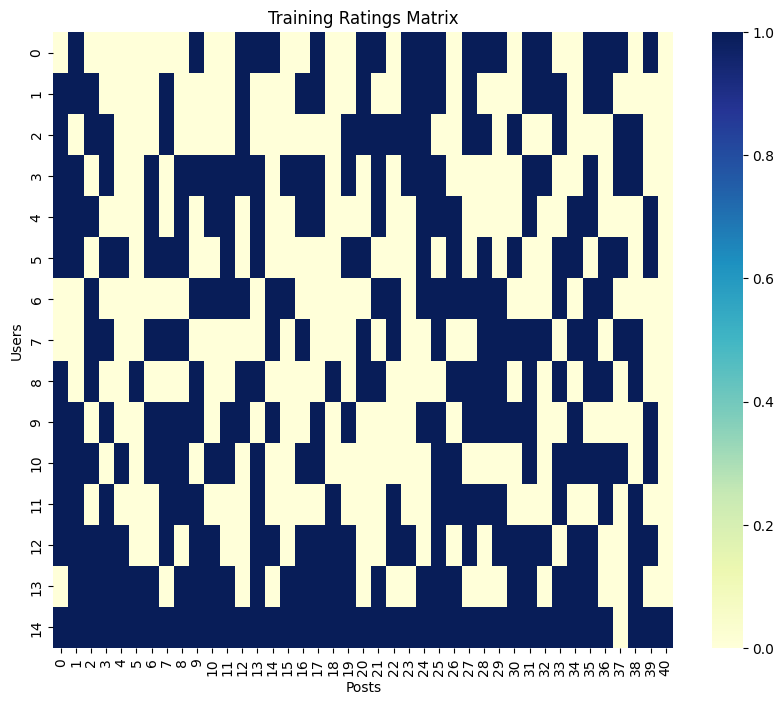

------------------------------------------------------
user similarity shape:  (15, 15)
user similarity:  [[1.         0.65079137 0.43386092 0.60612813 0.47434165 0.4
  0.5797509  0.46169026 0.5797509  0.58554004 0.43915503 0.43386092
  0.57008771 0.39467611 0.67175144]
 [0.65079137 1.         0.52941176 0.55629391 0.51449576 0.3796283
  0.45732956 0.44513191 0.51449576 0.47633051 0.58218174 0.41176471
  0.57078179 0.42808634 0.65192024]
 [0.43386092 0.52941176 1.         0.45514956 0.22866478 0.54232614
  0.45732956 0.5007734  0.51449576 0.47633051 0.26462806 0.47058824
  0.47565149 0.3805212  0.61357199]
 [0.60612813 0.55629391 0.45514956 1.         0.68806246 0.4662524
  0.44232587 0.47836487 0.39317855 0.59152048 0.59152048 0.40457739
  0.61339562 0.73607474 0.72531852]
 [0.47434165 0.51449576 0.22866478 0.68806246 1.         0.52704628
  0.44444444 0.43259046 0.38888889 0.56577895 0.8229512  0.34299717
  0.5547002  0.73960026 0.67082039]
 [0.4        0.3796283  0.54232614 0.466252

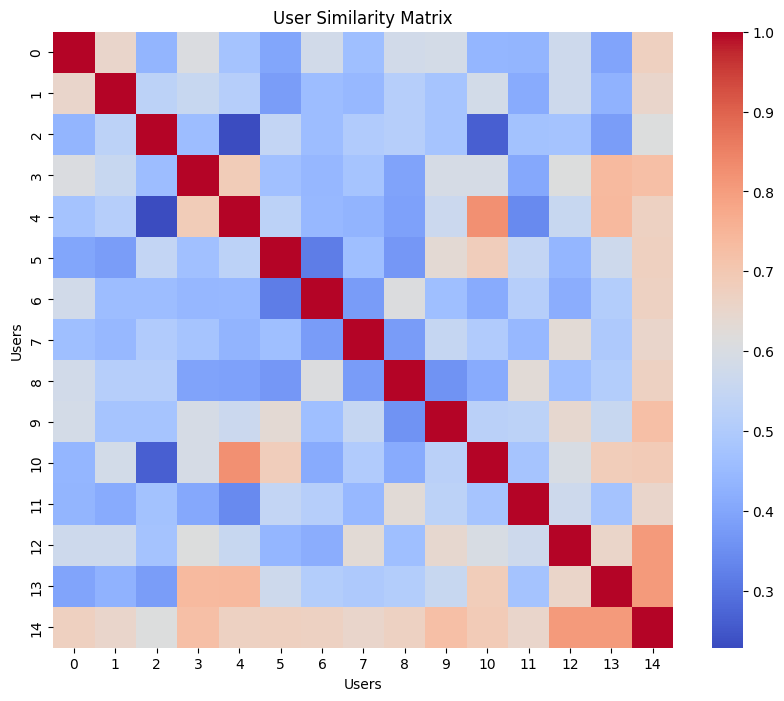

Processing recommendations for user index: 0
sim_scores:  [1.         0.65079137 0.43386092 0.60612813 0.47434165 0.4
 0.5797509  0.46169026 0.5797509  0.58554004 0.43915503 0.43386092
 0.57008771 0.39467611 0.67175144]
------------------------------------------------------
similar users:  [14  1  3  9  6  8 12  4  7 10  2 11  5 13]
------------------------------------------------------
post score:  [0.67175144 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144
 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144
 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144
 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144
 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144
 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144 0.67175144
 0.67175144 0.         0.67175144 0.67175144 0.67175144]
------------------------------------------------------
post score:  [1.32254282 1.32254282 1.32254282 0.67175144 0.67175144 0.67175144
 0.

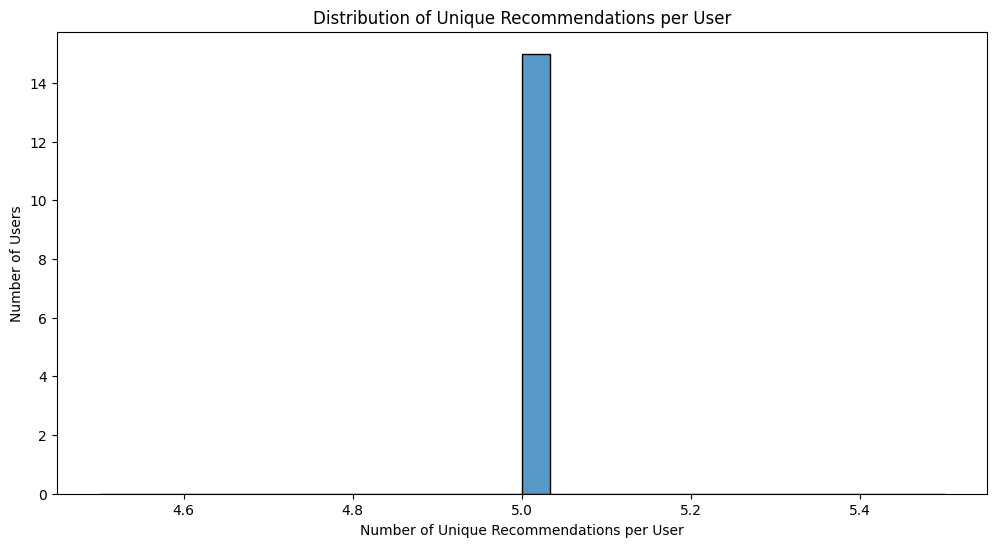

Recommendations for user 669c0b8e2ea43ac3b0c83bd8: ['6701a1a1a1a1a1a1a1a1a1c0', '6701a1a1a1a1a1a1a1a1a1a2', '6701a1a1a1a1a1a1a1a1a1a1', '6701a1a1a1a1a1a1a1a1a1ae', '6701a1a1a1a1a1a1a1a1a1b2']
Recommendations for user 669c0b8e2ea43ac3b0c83be4: ['6701a1a1a1a1a1a1a1a1a1a1', '6701a1a1a1a1a1a1a1a1a1a8', '6701a1a1a1a1a1a1a1a1a1bc', '6701a1a1a1a1a1a1a1a1a1bd', '6701a1a1a1a1a1a1a1a1a1c8']
Recommendations for user 669c0b8e2ea43ac3b0c83bd5: ['6701a1a1a1a1a1a1a1a1a1a3', '6701a1a1a1a1a1a1a1a1a1c3', '6701a1a1a1a1a1a1a1a1a1a8', '6701a1a1a1a1a1a1a1a1a1bc', '6701a1a1a1a1a1a1a1a1a1c2']
Recommendations for user 669c0b8e2ea43ac3b0c83bd7: ['6701a1a1a1a1a1a1a1a1a1ba', '6701a1a1a1a1a1a1a1a1a1c0', '6701a1a1a1a1a1a1a1a1a1c4', '6701a1a1a1a1a1a1a1a1a1a3', '6701a1a1a1a1a1a1a1a1a1b2']
Recommendations for user 669c0bb23cfd9ea81c694fc8: ['6701a1a1a1a1a1a1a1a1a1c0', '6701a1a1a1a1a1a1a1a1a1c4', '6701a1a1a1a1a1a1a1a1a1a3', '6701a1a1a1a1a1a1a1a1a1b9', '6701a1a1a1a1a1a1a1a1a1b2']


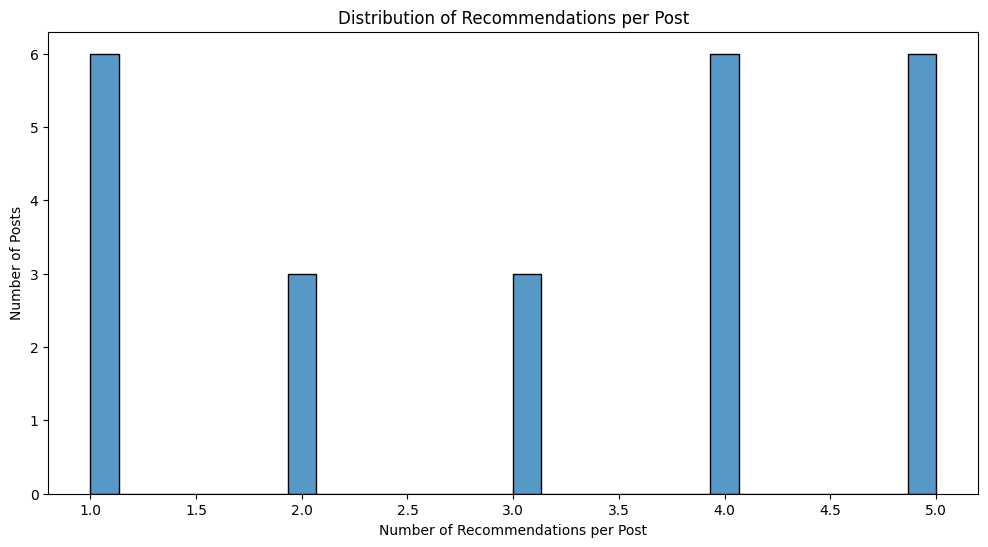

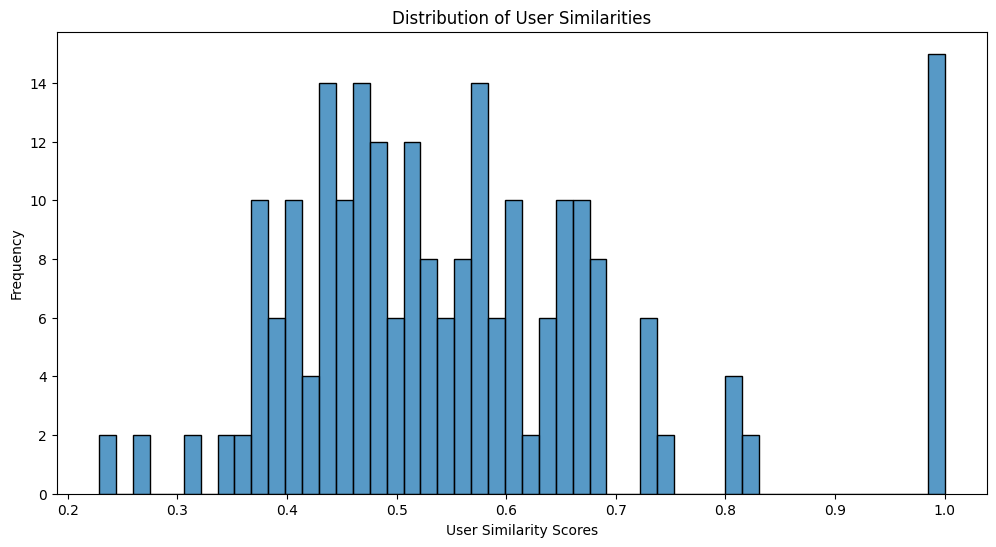

In [18]:
def visualize_user_similarity(user_similarity):
    # Distribution of user similarities
    similarity_scores = user_similarity.flatten()
    plt.figure(figsize=(12, 6))
    sns.histplot(similarity_scores, bins=50, kde=False)
    plt.xlabel('User Similarity Scores')
    plt.ylabel('Frequency')
    plt.title('Distribution of User Similarities')
    plt.show()

# Train the model
train_matrix, recommendations, user_similarity = train_model()

# Visualize the recommendations and user similarities
visualize_recommendations(recommendations)
visualize_user_similarity(user_similarity)